<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.3: Stacking

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667
    - **ROC AUC**  = 0.9614
- Try to achieve better results!

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

In [43]:
## Import Libraries

import itertools
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn import datasets

from sklearn.metrics import accuracy_score, roc_auc_score,recall_score,auc,precision_recall_curve,precision_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.classifier import StackingClassifier

# conda install -c conda-forge mlxtend
!pip install mlxtend  
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

In [2]:
# breast-cancer-wisconsin-data-old.csv
bc = pd.read_csv('../DATA/breast-cancer-wisconsin-data-old.csv',names=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class'])
bc.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Step 2: Find the Data
## Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. WIlliam H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992

In [3]:
bc.columns = bc.columns.str.replace(' ','_')

In [4]:
bc.columns = bc.columns.str.lower()

In [5]:
bc.head()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [6]:
print("Number of rows:", len(bc))
print("Number of columns:", bc.shape[1])
bc.shape

Number of rows: 699
Number of columns: 11


(699, 11)

In [7]:
bc.describe()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sample_code_number           699 non-null    int64 
 1   clump_thickness              699 non-null    int64 
 2   uniformity_of_cell_size      699 non-null    int64 
 3   uniformity_of_cell_shape     699 non-null    int64 
 4   marginal_adhesion            699 non-null    int64 
 5   single_epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei                  699 non-null    object
 7   bland_chromatin              699 non-null    int64 
 8   normal_nucleoli              699 non-null    int64 
 9   mitoses                      699 non-null    int64 
 10  class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [9]:
bc['bare_nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [10]:
feat = bc.loc[bc['bare_nuclei']=='?',:]

In [11]:
bc.drop(feat.index, axis=0, inplace=True)

In [12]:
bc['bare_nuclei']=bc['bare_nuclei'].astype(dtype='int64')

In [13]:
bc.dtypes

sample_code_number             int64
clump_thickness                int64
uniformity_of_cell_size        int64
uniformity_of_cell_shape       int64
marginal_adhesion              int64
single_epithelial_cell_size    int64
bare_nuclei                    int64
bland_chromatin                int64
normal_nucleoli                int64
mitoses                        int64
class                          int64
dtype: object

In [14]:
bc.columns

Index(['sample_code_number', 'clump_thickness', 'uniformity_of_cell_size',
       'uniformity_of_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

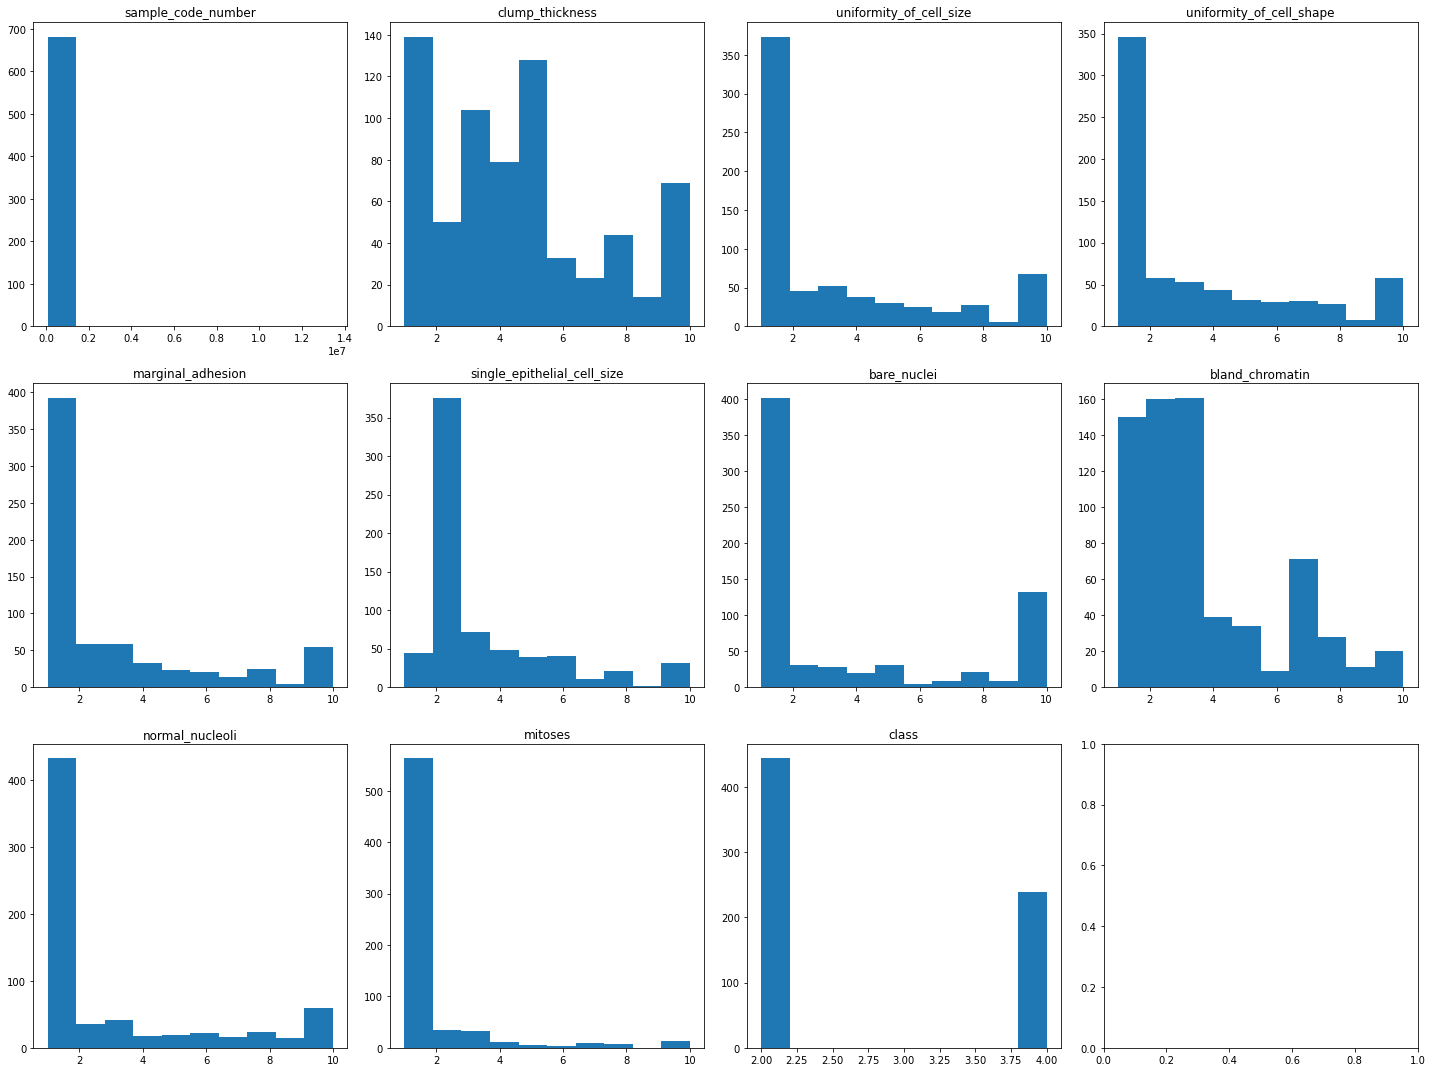

In [15]:
plt.subplots(3,4, figsize=(20,15))  
num=1
for feat in bc.columns:
    plt.subplot(3,4,num)
    plt.hist(x=bc[feat],bins=10)
    plt.title(f'{feat}')
    num+=1
    
plt.tight_layout()

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [16]:
feat=[col for col in bc.columns[1:] if col !='class']

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [17]:
feat

['clump_thickness',
 'uniformity_of_cell_size',
 'uniformity_of_cell_shape',
 'marginal_adhesion',
 'single_epithelial_cell_size',
 'bare_nuclei',
 'bland_chromatin',
 'normal_nucleoli',
 'mitoses']

In [18]:
X=bc[feat]
y=bc['class']

In [19]:
y.value_counts()

2    444
4    239
Name: class, dtype: int64

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [28]:
clf1 = RandomForestClassifier(max_depth=10)
clf2 = KNeighborsClassifier(n_neighbors =3)
clf3 = GaussianNB()

meta_clf = LogisticRegression()

stacking = StackingClassifier(classifiers=[clf1,clf2,clf3],meta_classifier=meta_clf)

In [29]:
stacking.fit(X_train,y_train)

StackingClassifier(classifiers=[RandomForestClassifier(max_depth=10),
                                KNeighborsClassifier(n_neighbors=3),
                                GaussianNB()],
                   meta_classifier=LogisticRegression())

In [38]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [30]:
stacking.score(X_train,y_train)

1.0

In [33]:
model_1st = [clf1,clf2,clf3,meta_clf,stacking]
model_name = ['Random Forest','KNN','GuassianNB','Stacking']

In [34]:
train_model_score=[]
test_model_score=[]
for model in model_1st:
    model.fit(X_train, y_train)
    train_model_score.append(model.score(X_train,y_train))
    test_model_score.append(model.score(X_test,y_test))

In [35]:
train_model_score

[1.0, 0.973741794310722, 0.9584245076586433, 0.975929978118162, 1.0]

In [39]:
stacking.score(X_test,y_test)

0.9557522123893806

In [40]:
stacking.score(X_train,y_train)

1.0

In [44]:
y_test_prep = stacking.predict(X_test)
print(accuracy_score(y_test,y_test_prep))
print(roc_auc_score(y_test,y_test_prep))

0.9557522123893806
0.9453386988598256


# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [47]:
bc.columns

Index(['sample_code_number', 'clump_thickness', 'uniformity_of_cell_size',
       'uniformity_of_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [66]:
X = bc[['clump_thickness','uniformity_of_cell_size']]

In [67]:
X1= np.array(X_1)
y1= np.array(y)

Accuracy: 0.93 (+/- 0.02) [K-NN]
Accuracy: 0.93 (+/- 0.04) [Random Forest]
Accuracy: 0.95 (+/- 0.03) [Naïve Bayes]
Accuracy: 0.93 (+/- 0.04) [Stacking Classifier]


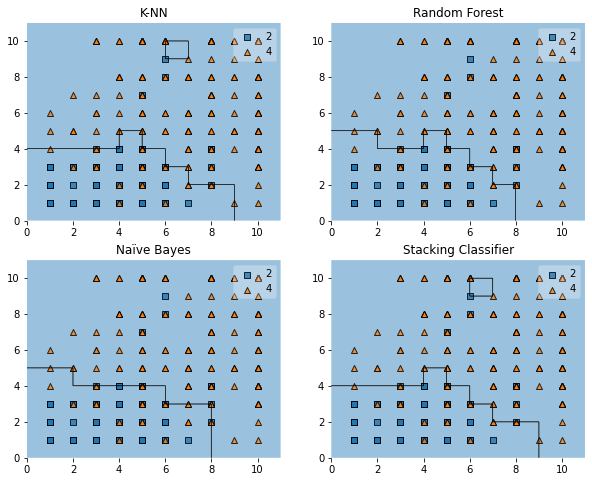

In [68]:
label = ['K-NN', 'Random Forest', 'Naïve Bayes', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, stacking]
    
fig = plt.figure(figsize = (10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0, 1], repeat = 2)

clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X1, y1, cv = 3, scoring = 'accuracy')
    print('Accuracy: %.2f (+/- %.2f) [%s]' % (scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X1, y1)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X1, y = y1, clf = clf)
    plt.title(label)

plt.show()

In [ ]:
# plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 33)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, sclf, print_model = False, style = 'ggplot')
plt.show()

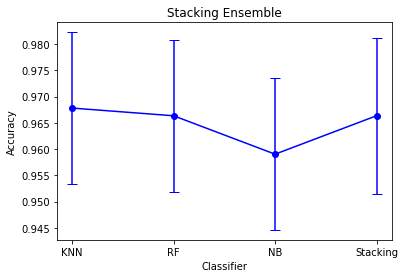

In [57]:
# plot classifier accuracy    
plt.figure()
(_, caps, _) = plt.errorbar(
    range(4),
    clf_cv_mean,
    yerr = clf_cv_std,
    c = 'blue',
    fmt = '-o',
    capsize = 5)

for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                

plt.title('Stacking Ensemble')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.xticks(range(4), ['KNN', 'RF', 'NB', 'Stacking'])     
plt.show()

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

© 2020 Institute of Data